# COGS 118A - Final Project

# Optimizing Room Occupancy Detection using Random Forests

# Names

- Duy Vu
- Lexu (Gavin) Zhao
- Tianyi Bian
- Tunan Li

# Abstract 

Our goal is to design and execute a machine-learning model that estimates room occupancy based on temperature, light, sound, CO2, and digital passive infrared (PIR) data. We will use data provided by UCI, which consists of 10,129 instances and 16 attributes.  To generate an accurate model predicting room occupancy, we used Random Forest and referenced published data as our performance benchmark. We start with feature transformation, to have more features available for training, then with the goal of constructing an efficient model, we tried to minimize the number of features used for prediction by using a careful feature selection. Girdsearch cross-validation was also performed to improve our prediction accuracy. By executing this project, we successfully construct a model that accurately estimates room occupancy, which can be used to optimize energy consumption and improve building management. The result suggests that our optimized model, compared to both the reference literature as well as the initial model we constructed, not only takes in fewer features but also has better performance. The experience gained in this project demonstrates the crucial importance of fine-tuning models as well as feature selection. The model construction process also provides us with more insight into which sensor is most useful in occupancy estimation.




# Background

In recent years, there has been a growing interest in developing smart and energy-efficient buildings. One important aspect of building management is the efficient use of resources, including energy consumption. Occupancy-based control is a popular strategy for optimizing energy usage in buildings. By accurately estimating the number of occupants in a room, building managers can adjust heating, cooling, and lighting systems to meet the occupants' needs while minimizing energy waste. The building might also sent out automatic warnings to facilitate security guards when it detects occupents after closing time. 
Research on occupancy-based control using machine learning has been active in recent years. Many studies have proposed and evaluated various models and algorithms for predicting occupancy based on sensor data. For instance, the study conducted by Wang et al. (2019) <a name="cite1" href="https://www.sciencedirect.com/science/article/pii/S0926580518302656"><sup>[1]</sup></a> used SVM and Random Forest models to estimate occupancy based on temperature and humidity sensor data. The study carried out a 30-day experiment in a library and utilized data mining techniques to model occupancy patterns. As a result, the heating, ventilation, and air conditioning (HVAC) systems were able to achieve better performance. 

Another research is from Adarsh et al. (2020)<a name="cite2" href="https://web2py.iiit.ac.in/research_centres/publications/view_publication/mastersthesis/872"><sup>[2]</sup></a> that studies the sensor data analytics and data reduction techniques. The research discussed occupancy estimation using ML, analysis of ML algorithms from the perspective of constrained microcontrollers, and ML-based data transmission reduction for occupancy applications. Additionally, occupancy estimation is a key task in building automation, energy efficiency, and security. Previous research has proposed various approaches to estimate occupancy levels, including the use of multivariate sensor nodes and machine learning algorithms (Singh et al., 2018)<a name="cite2" href="https://web.archive.org/web/20200310233053id_/https://ntnuopen.ntnu.no/ntnu-xmlui/bitstream/handle/11250/2624923/globecomm-2019.pdf?sequence=1"><sup>[3]</sup></a>. In this project, we build upon this previous work by developing a machine learning model to predict room occupancy levels in a specific context.

# Problem Statement

This project aims to develop a machine-learning model that accurately estimates and predicts the number of people in a room using a dataset collected at different times throughout 4 days from various types of sensors, including those that detect temperature, light, sound, CO2, and PIR, respectively. It’s contributional in solving the task of monitoring room occupancy in real-time. To achieve this goal, our machine learning algorithm, based on the methods of Random Forest, will be trained and tested using a large dataset of sensor measurements collected from real-world scenarios.

Significance: 

The development of a machine learning project to predict room occupancy could have significant implications for predicting and preventing burglary in private households. By analyzing factors such as temperature, sound, and time, the model could help to identify anomalies in household occupancy patterns and alert homeowners to potential security threats. This could be especially useful for people who travel frequently or have second homes that are left unoccupied for extended periods of time. 

Addditionally, The development of a machine learning model to predict room occupancy has significant implications for future public usage, such as in a public library. With accurate and timely predictions of the number of people in a given space predicted the machine learning model, library staff can optimize their resources, ensuring that there are enough staff members to meet the needs of patrons, and minimizing costs at the same time. The model could also be used to improve the overall user experience under the context of library rooms. By analyzing factors such as temperature and sound, the model can provide insights into the comfort level of library spaces, which can effectively help staff to make adjustments to optimize the user experience. The development of this model could pave the way for future innovations in public area management and resource allocation. As machine learning and other artificial intelligence technologies continue to advance, public places will have more tools at their disposal to improve their operations and services.

Overall, even though our model has a disadvantage due to the limited results it could produce (a room with less than 4 people), the significance of this project lies in its potential to improve the efficiency, effectiveness, and overall user experience of public spaces such as library rooms and the security of the private household.

# Data

Room Occupancy Estimation Data Set: 
- Link: https://archive.ics.uci.edu/ml/datasets/Room+Occupancy+Estimation
- Reference: Data collected by Adarsh Pal Singh (IIIT Hyderabad, India), Dr. Sachin Chaudhari (IIIT Hyderabad, India)
- Size of the dataset: 16 variables, 10130 observations
- An observation consists with the specified time during the period of 4 days and the readout values from five different types of non-intrusive sensors that measure temperature (4 sensors), light (4 sensors), sound (4 sensors), CO2 (2 sensors) and digital passive infrared (2 sensors). The ground-truth value of a number of occupancies is also included. The variables listed below are considered to be critical, and they are represented in terms of numerical values with units labeled: temperature in degrees Celsius, light in Lux, sound in Volts (read by ADC devices), and Carbon Dioxide in PPM.
- Since each type of sensor includes multiple devices, we need to combine those numerous read-out data into a specific output value by weighted averaging, and clean up the outliers or null cells from the table due to the potential noises that are not related to the targeted room.


We believe in order to clean the null cells, it may be a good idea to check what kind of null cells are they. In other words, we would like to perform a permutation test on the missing cell to check what kind of missingness are. If the missing is MCAR, missing completely at random, we will perform the imputation using the mean/median values instead of just filling in with 0. For example, if there is a null value in the sound column, then we impute the mean/median value of the entire column to keep the general distribution.
To combine the datasets, we will use pd.concat or pd.merge, and we believe that the order does not matter. We contact all the columns to a big dataframe and evaluate from this dataframe. In general, we will have columns for data from 4 temperature sensors, 4 light sensors, 4 sound sensors, 2 CO2 sensors, and 2 digital passive sensors, where the rows are the individual data provided by these sensors.


In [ ]:
import numpy as np

In [ ]:
import pandas as pd
df = pd.read_csv(r"Occupancy_Estimation.csv")
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


Checking whether there are any empty columns. We will process if the data looks clean.

In [ ]:
data=pd.read_csv(r"Occupancy_Estimation.csv")
# load data
# data['Date'] = pd.to_datetime(data['Date'])
# change string to date(maybenot)
data.isna().sum()
# checking if we have empty columns
# looks clean so we will proceed

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

# Proposed Solution

A tentative solution to solve this problem is to adopt a Random Forest classification model. Random Forest works by combining multiple decision trees into a single model. Here are the steps involved in training a Random Forest model:

1. Randomly select a subset of data from the dataset (with replacement).
2. Build a decision tree on the subset of data using a random subset of features at each split.
3. Repeat the above two steps multiple times to create a forest of decision trees.
4. For classification problems, each decision tree in the forest predicts the class of the input data point, and the final output is determined by majority voting of all the trees in the forest.
5. For regression problems, each decision tree in the forest predicts a numeric value, and the final output is determined by averaging the values predicted by all the trees in the forest.

We know the exact parameters at each split and we can tell which variable contributes more to the final decision. This information is useful because, in real life, we don't want to have too many sensors in one room just for predicting how many people are in a room due to cost considerations. Finding which sensor contributes most to prediction can help us reduce the number of unnecessary sensors.More importantly, since we are interested in predicting the number of people in our room, we want our model to classify our data points into 4 different categories and generate 4 different labels representing the number of people in the room.(Room with 0 people, room with 1 person, room with 2 people, and room with 3 people).Therefore, using a Random Forest, capable of separating multiple classes and outputting multiple labels at one time, will be a good option. The nature of our dataset also suggests using a Random Forest.

By inspecting our dataset, it looks like most of our variables are sensor measurements which are numerical and different measurements, such as light measurement and temperature measurement, seem to have quite different ranges and don’t seem like they are normalized previously. Therefore, by using Random Forest classification model, which is a nonparametric approach, we don’t need to worry about normalizations. The sklearn document suggests that the inbound sklearn class RandomForestClassifier utilizes the CART tree, which only supports numerical data. Therefore, as our measurements are numerical, we can easily implement a decision tree just using basic sklearn and we are almost guaranteed success on model creation. 

For the benchmark, we proposed using SVM and Random Forest that are used in (Singh et al., 2018)<a name="cite2" href="https://web.archive.org/web/20200310233053id_/https://ntnuopen.ntnu.no/ntnu-xmlui/bitstream/handle/11250/2624923/globecomm-2019.pdf?sequence=1"><sup>[3]</sup></a>. According to the paper, with the features including Temp{1,2,3,4}, CO2, Slope, Sound{1,2,3,4}, PIR{6,7}, Light{1,2,3,4}, the accuracy of SVM(RBF) and Random Forest are 0.984 and 0.978 respectively. By implementing the Random Forest algorithm, we want to figure out if it's worth spending extra time to train for the Random Forest by comparing the performance of two models.

# Evaluation Metrics

Because we are doing a data classification, which is a classification problem, then the most appropriate error metrics are related to how many classifications we made on the test data are right or not; in other words, we have to avoid misclassification as much as possible. As we will use logistic regression in our model to predict the probability of data containing 0,1,2,3 people in total. We are going to use the recall: which is the true positive rate, which is the P(detect positive | true positive), and this equals to P(detect positive and true positive)/P(true positive), and we want this probability as closer to one as possible for a good model. Another error metric we use is the specificity, which calculates the probability of having correct negative labels. Mathematically,  P(detect negative | true negative), which is equivalent to P(detect negative and true negative)/P(true negative).

We want to maximize the presicion since we care a lot if a person detected positive is positive. But in our case, we don’t have special weight on either side of the positive/negative, this is why we care about the both true posibve rate and true negative rate equally. We will use these metrics into either One vs One or One vs Rest to validate if our model is solid.

A good model is where it has both low occurrences of Type I and Type II error, which are false positives and false negatives. If the model has higher recall and specificity, this means the model is accurate. We may also take into account of F-score, and we want a higher F-score as possible.

# Results


### Data Transformation

In the initial exploratory data analysis (EDA) of the Room Occupancy Estimation dataset, we included the date and time as features for the machine learning algorithm predicting room occupancy. We initially believed that time could have a high correlation with other features, such as temperature which might help us improve our prediction accuracy. The temperature might help to capture seasonal or periodic patterns, and it might have a high correlation with other features, such as temperature, considering the fact that temperature varies at different times of the day. Therefore, we transformed the time data into continuous variables in terms of seconds and minutes, so that we can identify more nuanced patterns than we simply included as discrete values in the original table. Additionally, we also transformed the date data into categorical variables using one-hot encoding. This helps us to capture any potential patterns in occupancy related to time and date. We hoped that these transformations would help to extract more valuable information from these variables and improve the accuracy of our occupancy predictions.



Applying One-Hot encoding to the date variable

In [ ]:
# one hot encoding date variable

unique = data['Date'].unique()

(data['Date'] == unique[0]).astype(int)

for i in unique:
    data[f'one_hot_{i}']= (data['Date'] == i).astype(int)
    
set(data["Room_Occupancy_Count"])
data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S6_PIR,S7_PIR,Room_Occupancy_Count,one_hot_2017/12/22,one_hot_2017/12/23,one_hot_2017/12/24,one_hot_2017/12/25,one_hot_2017/12/26,one_hot_2018/01/10,one_hot_2018/01/11
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0,0,1,1,0,0,0,0,0,0
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0,0,1,1,0,0,0,0,0,0
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0,0,1,1,0,0,0,0,0,0
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0,0,1,1,0,0,0,0,0,0
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,...,0,0,0,0,0,0,0,0,0,1
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,...,0,0,0,0,0,0,0,0,0,1
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,...,0,0,0,0,0,0,0,0,0,1
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,...,0,0,0,0,0,0,0,0,0,1


Converting time to continuous variables

In [ ]:
import pandas as pd

def time_to_seconds(t):
    h, m, s = map(int, t.split(':'))
    return 3600*h + 60*m + s

data['Time_in_seconds'] = data['Time'].apply(time_to_seconds)
last_col = data.iloc[:, -1]
# insert the last column at the second position
data.insert(1, 'Time in Second', last_col)
data = data.drop(columns='Time_in_seconds')

def time_to_minutes(t):
    h, m, s = map(int, t.split(':'))
    return 60*h + m

data['Time_in_minutes'] = data['Time'].apply(time_to_minutes)

last_col = data.iloc[:, -1]
# insert the last column at the second position
data.insert(1, 'Time in Minutes', last_col)
data = data.drop(columns='Time_in_minutes')

In [ ]:
data

,Date,Time in Minutes,Time in Second,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,...,S6_PIR,S7_PIR,Room_Occupancy_Count,one_hot_2017/12/22,one_hot_2017/12/23,one_hot_2017/12/24,one_hot_2017/12/25,one_hot_2017/12/26,one_hot_2018/01/10,one_hot_2018/01/11
0,2017/12/22,649,38981,10:49:41,24.94,24.75,24.56,25.38,121,34,...,0,0,1,1,0,0,0,0,0,0
1,2017/12/22,650,39012,10:50:12,24.94,24.75,24.56,25.44,121,33,...,0,0,1,1,0,0,0,0,0,0
2,2017/12/22,650,39042,10:50:42,25.00,24.75,24.50,25.44,121,34,...,0,0,1,1,0,0,0,0,0,0
3,2017/12/22,651,39073,10:51:13,25.00,24.75,24.56,25.44,121,34,...,0,0,1,1,0,0,0,0,0,0
4,2017/12/22,651,39104,10:51:44,25.00,24.75,24.56,25.44,121,34,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,538,32287,08:58:07,25.06,25.13,24.69,25.31,6,7,...,0,0,0,0,0,0,0,0,0,1
10125,2018/01/11,538,32317,08:58:37,25.06,25.06,24.69,25.25,6,7,...,0,0,0,0,0,0,0,0,0,1
10126,2018/01/11,539,32348,08:59:08,25.13,25.06,24.69,25.25,6,7,...,0,0,0,0,0,0,0,0,0,1
10127,2018/01/11,539,32379,08:59:39,25.13,25.06,24.69,25.25,6,7,...,0,0,0,0,0,0,0,0,0,1


### Performing Random Forest

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Splitting data into training set and testing set.

In [ ]:
X=data.drop(columns=["Room_Occupancy_Count","Date","Time"])
y=data["Room_Occupancy_Count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Fitting the train data and predict the test label.

In [ ]:
clf = RandomForestClassifier(max_depth=3, random_state=0,class_weight="balanced")
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

Using balanced weight becasue again we don't want our model to just guess 0 and still work well!

Accuracy score and confusion matrix.

Accuracy: 0.9928938018160284


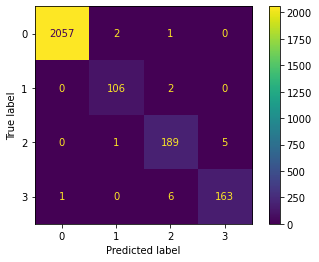

In [ ]:
print("Accuracy: " + str(accuracy_score(y_test,y_pred)))
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
X_standard=df.drop(columns=["Room_Occupancy_Count","Date","Time"])
y_standard=df["Room_Occupancy_Count"]
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_standard, y_standard, random_state=0)

Accuracy_standard: 0.9932885906040269


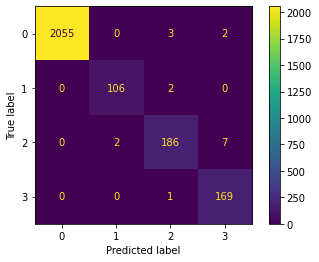

In [ ]:
clf_standard = RandomForestClassifier(max_depth=3, random_state=0,class_weight="balanced")
clf_standard.fit(X_train_standard, y_train_standard)
y_pred_standard=clf_standard.predict(X_test_standard)
print("Accuracy_standard: " + str(accuracy_score(y_test_standard,y_pred_standard)))
confusion_matrix = metrics.confusion_matrix(y_test_standard,y_pred_standard)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

### Feature Selection

  In order to determine the some of the important features, we create two thresholds of 0.005 and 0.002. Then, the feature are considered important if they are greater than the chosen threshold.

  During the feature selection process of our Room Occupancy Estimation project, we first utilized Random Forest to identify the most relevant sensors for predicting occupancy. We initially used the “model_importances_ ”  from random forest to obtain a ranked list of importance scores for each feature, with the highest three scores belonging to light, sound, and CO2 slope features. However, further exploration of this value shows that these calculations might not be informative as these values have large standard deviations. The likely reason that directly using the model_importances won't work is that our data is continuous. Feature importances, which rely on the decrease of impurity might not work as well when our data has many unique values. To further explore the relevance of each feature, we used “permutation_importance” to assess the importance of each feature individually by randomly dropping features and measuring the impact on the model's accuracy. We then plotted a bar graph of the results shown below, which revealed that the light, sound, and CO2 slope features still had the highest importance scores but this time the standard deviation is much smaller and our result is more reliable.


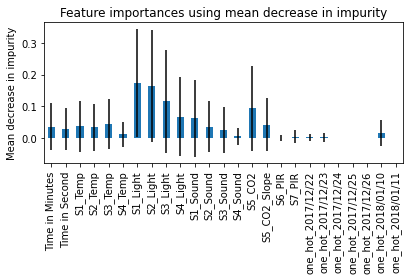

In [ ]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(clf.feature_importances_,index=X_train.columns )
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std,ax=ax)
ax.set_title("Feature importances using mean decrease in impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

  In order to find the most relevant sensors, we use feature_importances_ property that provides a ranked list of the importance scores for each feature used in the Random Forest model. The higher the score, the more important the feature is in making accurate predictions. The highest three score reported are 0.24196258, 0.13430008, and 0.13225442 that represent light, sound and CO2 slope feature respectively.

we realized that since our data is continuous, maybe just using the feature importances will not be the optimal solution.

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=0, n_jobs=2
)


In [ ]:
forest_importances = pd.Series(result.importances_mean,index=X_test.columns)

Now, we want to explore a little bit on how well we are doing, therefore we first try the simplist case, in which we just don't take the value of date, time into account but having all the other variables availble to use.

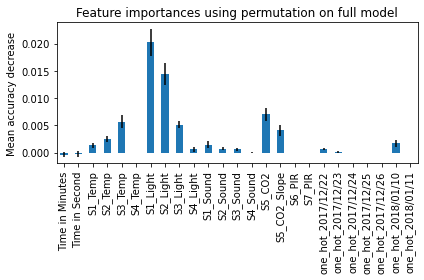

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

  The highest three scores recorded are 0.24196258, 0.13430008, and 0.13225442, which correspond to the light, sound, and CO2 slope features, respectively. These results appear reasonable since light, sound, and CO2 slope are the most effective indicators of room occupancy. The light sensor can detect movements of individuals entering and leaving the room, enabling estimation of occupancy and monitoring of movement patterns. Sound sensors can capture sounds produced by people in the room, such as talking, walking, or other actions. By analyzing the frequency and intensity of these sounds, it is possible to determine the number of individuals in the room and their level of activity. CO2 slope sensors can identify fluctuations in the concentration of carbon dioxide in the atmosphere, which may indicate the presence of individuals breathing and exhaling. This data can be utilized to estimate occupancy and determine ventilation requirements.

In [ ]:
print(type(forest_importances))
forest_importances_dict = forest_importances.to_dict()

<class 'pandas.core.series.Series'>


In [ ]:
thresholds = [0.005,0.002]

important_features = []

for threshold in thresholds:
  current_important_features = []
  for feature in forest_importances_dict:
    if forest_importances_dict[feature] >= threshold:
      current_important_features.append(feature)
  important_features.append(current_important_features)
print(important_features)



[['S3_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S5_CO2'], ['S2_Temp', 'S3_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S5_CO2', 'S5_CO2_Slope']]


  After generating a plot showing the importance of each feature, we wanted to select the most important ones to use in our algorithm. To determine which features to include, we set two thresholds of 0.010 and 0.002. If a feature had an importance score greater than the chosen threshold, it was considered important and included in the final feature list.
Specifically, the first threshold resulted in five important features, namely 'S3_Temp', 'S1_Light', 'S2_Light', 'S3_Light', and 'S5_CO2'. The second threshold resulted in seven important features, which included all the features from the first threshold, along with 'S5_CO2_Slope', 'S2_Temp', and 'S3_Temp'. We wanted to find two accuracies of the algorithm that considers each of these feature lists separately, then choose the higher one. To do this, we used the code provided and trained two separate models with the two different feature lists obtained from the thresholding process.




In [ ]:
data_without_label=data.drop(columns=["Room_Occupancy_Count","Date","Time"])
data_without_label.head()

,Time in Minutes,Time in Second,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S5_CO2_Slope,S6_PIR,S7_PIR,one_hot_2017/12/22,one_hot_2017/12/23,one_hot_2017/12/24,one_hot_2017/12/25,one_hot_2017/12/26,one_hot_2018/01/10,one_hot_2018/01/11
0,649,38981,24.94,24.75,24.56,25.38,121,34,53,40,...,0.769231,0,0,1,0,0,0,0,0,0
1,650,39012,24.94,24.75,24.56,25.44,121,33,53,40,...,0.646154,0,0,1,0,0,0,0,0,0
2,650,39042,25.00,24.75,24.50,25.44,121,34,53,40,...,0.519231,0,0,1,0,0,0,0,0,0
3,651,39073,25.00,24.75,24.56,25.44,121,34,53,40,...,0.388462,0,0,1,0,0,0,0,0,0
4,651,39104,25.00,24.75,24.56,25.44,121,34,54,40,...,0.253846,0,0,1,0,0,0,0,0,0


Accuracy0.9648637978681406


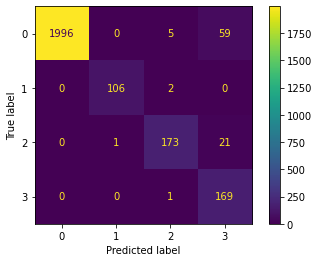

In [ ]:

X_005=data_without_label[important_features[0]]
X_train_005, X_test_005, y_train_005, y_test_005 = train_test_split(X_005, y, random_state=0)

# Fitting data
clf_005 = RandomForestClassifier(max_depth=3, random_state=0,class_weight="balanced")
#clf_nodate = RandomForestClassifier(max_depth=3, random_state=0,)
#added class weight argument so our model only guess 0.
clf_005.fit(X_train_005, y_train_005)
y_pred_005=clf_005.predict(X_test_005)

# Accuracy and confusion matrix
print("Accuracy" + str(accuracy_score(y_test_005,y_pred_005)))
confusion_matrix = metrics.confusion_matrix(y_test_005,y_pred_005)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

Accuracy0.9790761942360837


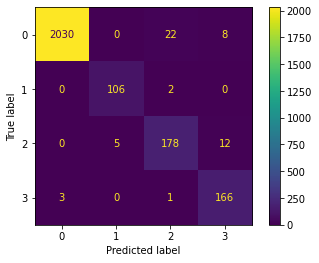

In [ ]:
X_002=data_without_label[important_features[1]]
X_train_002, X_test_002, y_train_002, y_test_002 = train_test_split(X_002, y, random_state=0)

# Fitting data
clf_002 = RandomForestClassifier(max_depth=3, random_state=0,class_weight="balanced")
#clf_nodate = RandomForestClassifier(max_depth=3, random_state=0,)
#added class weight argument so our model only guess 0.
clf_002.fit(X_train_002, y_train_002)
y_pred_002=clf_002.predict(X_test_002)

# Accuracy and confusion matrix
print("Accuracy" + str(accuracy_score(y_test_002,y_pred_002)))
confusion_matrix = metrics.confusion_matrix(y_test_002,y_pred_002)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

The accuracy of the first model trained with the first feature list was found to be 0.9649, whereas the accuracy of the second model trained with the second feature list was found to be 0.9791, and the confusion matrices were plotted for both. Based on these results, we concluded that the second model with seven important features performed slightly better than the first model with five important features. Therefore, we selected the second model as our final model for predicting room occupancies.

### GridSearch Cross Validation

In order to improve the performance of our model, we performed GridSearch cross-validation to identify the optimal hyperparameters for the Random Forest Classifier. This process involved systematically trying different combinations of hyperparameters to ensure that the model was not overly sensitive to a particular choice and to prevent overfitting. The hyperparameters we tuned were the maximum depth of the tree, minimum samples split, criterion, and class weight. We tested 10 different values for maximum depth, 7 for minimum sample split, and 2 for criterion and class weight, for a total of 280 different combinations.

After running GridSearch cross-validation with 5-fold cross-validation, we found that the best hyperparameters for our model were a maximum depth of 15, minimum samples split of 2, and a criterion of entropy, with balanced class weights. Using these hyperparameters, we achieved an accuracy of 0.9964 on the test set, indicating that the model was able to accurately classify the plant health based on the sensor data.

Comparing this to our original model, which included one-hot encoding for the date and continuous time, we found that the updated model with important features selected had a higher accuracy score, yet required fewer features. Using only the important features of S2_Temp, S3_Temp, S1_Light, S2_Light, S3_Light, S5_CO2, and S5_CO2_Slope, the updated model outperformed the original model with an accuracy of 0.9964, compared to 0.9929. This suggests that selecting important features can lead to better model performance and avoid overfitting.




In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
hyperparameters = {
    'max_depth': [2, 3, 4, 5, 7, 10, 13, 15, 18, 20], 
    'min_samples_split': [2, 5, 10, 20, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced',None]
}

In [ ]:
searcher = GridSearchCV(RandomForestClassifier(), hyperparameters, cv=5)
searcher.fit(X_train_002, y_train_002)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 7, 10, 13, 15, 18, 20],
                         'min_samples_split': [2, 5, 10, 20, 50, 100, 200]})

In [ ]:
searcher.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_split': 2}

Accuracy_cv 0.9964469009080142


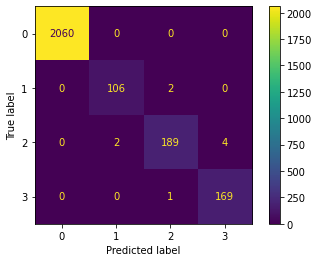

In [ ]:
pred = searcher.predict(X_test_002)
print("Accuracy_cv " + str(accuracy_score(y_test_002,pred)))
confusion_matrix = metrics.confusion_matrix(y_test_002,pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

Compare to the our first original model that includes one-hot encoding date and continuous time, we yield the higher accuracy score (as 0.9964 > 0.9929) with S2_Temp, S3_Temp, S1_Light, S2_Light, S3_Light, S5_CO2 and S5_CO2_Slope as important features.

# Discussion

### Interpreting the result
1. Before running the dataset through the model, we utilize one-hot encoding on the 'Date' variable with the hope that the algorithm can identify patterns and correlations between the date and the occupancy count. Additionally, we convert the 'time' variable into a continuous variable.This enables us to make informed decisions regarding which features are essential by properly integrating date and time into the algorithm. Yet the result suggest that the addition of transformed features even decreases the prediction accuracy. This suggest the importance of feature selection, and using appropirate numbers of features when doing machine learning as adding more features, in this case not only addes computational cost but also doesnt result in a increase in performance.

2. Understanding the importance of feature selection.We aim to identify the most significant subset of features by setting a threshold of 0.005 and 0.002 based on the mean accuracy decrease.When using a 0.005 threshold, we obtain an accuracy of 0.9648 using 5 important features. On the other hand, when using a 0.002 threshold, we obtain an accuracy of 0.9790 by selecting 7 important features. This suggests that even though all these selected features are important, when we don't have enough features, the accuracy is still subject to decrease. Moreover the graph also suggest that amoungts all light sensors, S2 has the highest importance score, which implies that the poistioning of light sensors are very important. Feature selection also help us realize that the motion sensor is not that useful in predicitng room occupancy.



3. After the feature selection, we perform Grid search cross-validation involving creating a grid of possible hyperparameter values and then training the model on each combination of hyperparameters. After using GridSearch we find out that as when adujust appropritate hyperparamters, we obtain the accuracy of 0.9964 which out performes the origianl data. This shows that the extensive grid search, even though at the cost of sacrifising time, is very capable of increasing accuracy of a model. Things need to be take care: this grid search using the cross validation find the best combination of parameters to avoid overfitting,but this does not gurantee each individual hyperparameter is in iteself the optimal one.


### Limitations

In the current work, we acknowledge a few limitations that may affect the validity and generalizability of our findings. One potential issue is the limited size of our dataset, which consisted of only four days of samples. More data could potentially change the nature of the problem and provide more insights into the relationship between environmental factors and room occupancy value. Another potential limitation is the fact that our dataset was collected from a single room, which may not be representative of other room environments. Therefore, our findings may not be applicable to other rooms with different environmental conditions or ventilation systems. Future studies could benefit from a larger and more diverse dataset to ensure greater generalizability of the findings.

Furthermore, CO2 concentration is an important environmental variable. However, in some cases, the CO2 concentration measurements can be biased due to the presence of plants in the room. Plants absorb CO2 during photosynthesis, which can lead to a decrease in the measured CO2 concentration. Therefore, it is important to consider the potential presence of plants when interpreting CO2 measurements.

Additionally, we used a specific set of hyperparameters for our machine-learning models based on the available computing resources and time constraints. It is possible that exploring more hyperparameters could result in higher accuracy scores or different feature importance rankings. Future studies could explore a wider range of hyperparameters or use more advanced techniques such as Bayesian optimization to better identify the optimal hyperparameters for the models.

Despite these limitations, we believe that our study contributes to the understanding of the relationship between environmental factors and room occupancy levels in classrooms. We hope that our findings can inform future research and practical interventions to improve indoor air quality in educational settings.


### Ethics & Privacy

One ethical problem it may raise is that it is the case the people who don’t move will highly likely be ignored by the motion detector. For example, a disabled person who doesn’t move will have low motion data, and it is easy for us to misclassify it as a room has no people, but in fact, they are classified as real people. This may seem offensive to them.


Additionally, after our model is trained well and has low test error and generation error, our model may be misused by a person who illegally wants to pry on others, since some people may don’t want others to know if they appear in a room, and most pries are illegal.


Lastly, we have to think about security issues: when bad thieves use our model to detect how many people are there in an apartment, it may give them ideas about when to come in. In other words, if our model has predicted that none of the people in the room, this may provide opportunities for illegal actions such as theft

### Conclusion

Our study shows that a Random Forest classification model can accurately predict the number of people in a room based on sensor measurements. Furthermore, our model requires fewer features compared to the benchmark models, yet achieves better performance. This suggests that we don't need to use a lot of sensors for the room, resulting in cost savings while maintaining high accuracy. In the context of other work in this field, our study provides evidence for the effectiveness of Random Forest models in occupancy detection and emphasizes the importance of feature selection in achieving accurate predictions. Future work could explore the use of other machine learning algorithms and feature engineering techniques to further improve the accuracy and efficiency of occupancy detection systems.




# Team Expectations 

* As a team, its is important to have regular team meetings to discuss progress, challenges, and updates. This provides an opportunity for team members to share their thoughts and ideas and provide feedback.
* We also realize that there may be conflicts (for instance, some want to use model A and some want to use model B instead, and both come up with concise and logical reasons). In this case, we will ask for advice from the professor and TAs to make sure that all of us are in the good track. For difficulty, we can do the same thing: actively participate in the office hour and lectures to give us the opportunity to overcome the difficulties.
* When making the decision, we will do a plural mode of the vote, and the same for setting goals and schedule, Regular check-ins can help ensure that everyone is on track and adjustments can be made as soon as possible.
* Each team member should have a clear understanding of their responsibilities and workload. It's important to set each individual the same amount of time and work to make sure that we are going to finish on time, and starting early is important for us. 

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Task |
|---|---|---|
| 2/18  | 7 PM  | Group member introudction and Project kickoff |
| 2/20  | 7 PM  | Discuss project goals and divide tasks to each team members, Research on potential topics and select useful datasets, Review and finalize the selection |
| 2/22  | Morning  | Project Proposal Submission Deadline |
| 2/29  | 7 PM  | Discuss and choose appropriate and efficienty ML models, start building and training the selected ML models, Review progress and look for any issues appearing|
| 3/7  | 7 PM  | Checkpoint Write-up: Preliminary results including feature detection performance, learning or validation curves for model, etc. |
| 3/8  | Morning  | Checkpoint Submission Deadline |
| 3/15  | 7 PM  | Continue building and training ML models, Evaluate model performance and refine as needed, Prepare project presentation and finalize code |
| 3/22  | Before 11:59 PM | Final Project Submission Deadline, and Team Evaluation Survey  |

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Wang, Wei, et al. "Occupancy prediction through machine learning and data fusion of environmental sensing and Wi-Fi sensing in buildings." Energy and Buildings, vol. 177, 2018, pp. 14-26, doi: 10.1016/j.enbuild.2018.07.003.<br> 
<a name="admonishnote"></a>2.[^](#admonish): Singh, Adarsh Pal. "Machine Learning for IoT Applications: Sensor Data Analytics and Data Reduction Techniques." IIIT/TH/2020/64, advisor: Sachin Chaudhari, 30 June 2020.<br>
<a name="admonishnote"></a>3.[^](#admonish): Singh, A. P., Jain, V., Chaudhari, S., Kraemer, F. A., Werner, S., & Garg, V. (2018). Machine learning-based occupancy estimation using multivariate sensor nodes. In 2018 IEEE Globecom Workshops (GC Wkshps) (pp. 1-6). IEEE..<br>